# 1. found out optimal no of clusters for mall dataset using elbow method
# 2. applied kmeans algorithm 
# 3. visualised the results


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('Mall_Customers.csv')

In [4]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
dataset.shape

(200, 5)

In [14]:
X = dataset.iloc[:, [3,4]].values # we are making groups based on annual income and spending score

In [15]:
X.shape

(200, 2)

In [16]:
#y = dataset.iloc[:, 4].values
# no need for y since kmeans is an unsupervised algorithm

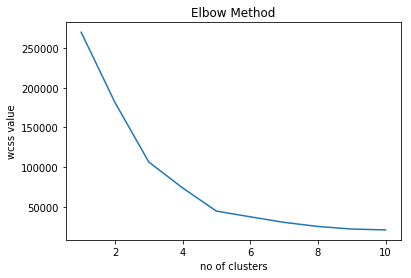

In [22]:
# finding out optimal k, ie, no of clusters for kmeans algo using elbow method
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_ stores the wcss value
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss value')
plt.show()

In [26]:
# take optimal no of clusters to be 5. After that, wcss value increasing exponentially
kmeans = KMeans(n_clusters = 5)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
kmeans.inertia_

44448.455447933709

In [27]:
y = kmeans.fit_predict(X)

In [28]:
y

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 4, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3])

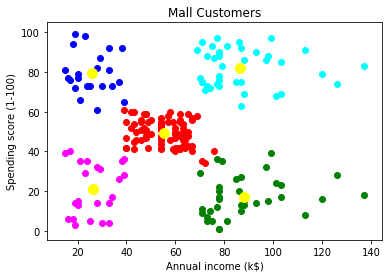

In [34]:
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = 'red', label = 'cluster1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'green', label = 'cluster2')
plt.scatter(X[y == 2, 0], X[y == 2, 1], color = 'blue',label = 'cluster3')
plt.scatter(X[y == 3, 0], X[y == 3, 1], color = 'cyan',label = 'cluster4')
plt.scatter(X[y == 4, 0], X[y == 4, 1], color = 'magenta',label = 'cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Mall Customers')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending score (1-100)')
plt.show()